<a href="https://colab.research.google.com/github/aaryagharmalkar/machine-learning-lab/blob/main/ML_expt5_aarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



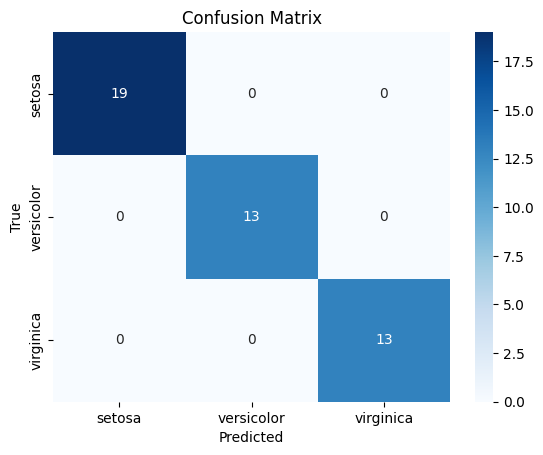

In [ ]:
# Install required libraries (if not already installed)
!pip install scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Load dataset (Iris CSV from GitHub)
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
data = pd.read_csv(url)

# Show first 5 rows
print(data.head())

# Split into features (X) and target (y)
X = data.drop("species", axis=1)
y = data["species"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm = SVC(kernel='linear')   # you can try 'rbf', 'poly'
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Wine Dataset

   Wine  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0     1    14.23        1.71  2.43               15.6        127   
1     1    13.20        1.78  2.14               11.2        100   
2     1    13.16        2.36  2.67               18.6        101   
3     1    14.37        1.95  2.50               16.8        113   
4     1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05        

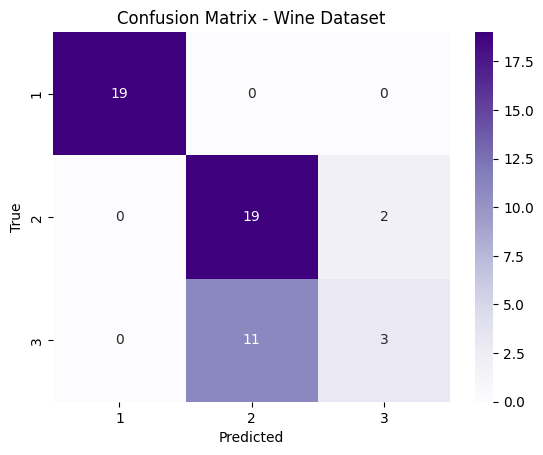

Cross-validation scores: [0.63888889 0.61111111 0.63888889 0.68571429 0.74285714]
Mean accuracy: 0.6634920634920635


In [ ]:
# Install required libraries
!pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# The Wine dataset from UCI does not have headers, so we need to provide them
# Also, the target variable is in the first column
column_names = ['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv(url, header=None, names=column_names)

# Inspect first 5 rows
print(data.head())

# Split features and target
X = data.drop("Wine", axis=1)   # features
y = data["Wine"]                # target (class labels: 1,2,3)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM (try RBF kernel for harder datasets)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Wine Dataset")
plt.show()

# Optional: Cross-validation to check stability
scores = cross_val_score(SVC(kernel='rbf'), X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())